In [105]:
import pandas as pd
import operator as op
import collections
import klcalculator

import matplotlib.pyplot as plt
import numpy as np

In [106]:
features = ['gender', 'AGE', 'POSTCODE', 'blood_group', 'eye_color', 'job']
data = pd.read_csv('our-synthetic.csv')[features]
data = data.fillna('Unemployed')
dataset = list(zip(*(data[fn].tolist() for fn in features)))

In [107]:
data[:20]

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,F,99,2649,B-,Brown,"Psychologist, counselling"
1,M,108,1780,A-,Hazel,Personnel officer
2,M,59,2940,B+,Hazel,Tourism officer
3,M,58,2945,B+,Blue,Make
4,M,30,2729,AB-,Brown,Forest/woodland manager
5,M,6,2531,A-,Grey,Unemployed
6,F,104,839,B+,Brown,Youth worker
7,M,11,2901,AB-,Grey,Unemployed
8,F,105,846,A-,Green,Camera operator
9,M,115,2912,A+,Grey,Retail merchandiser


In [108]:
len(data.gender.unique())

2

In [109]:
data.gender.unique()

array(['F', 'M'], dtype=object)

In [110]:
gen_dic_len = len(data.gender.unique())
for i in range(gen_dic_len):
    print (i)
    print(data.gender.unique()[i])


0
F
1
M


In [111]:
data.AGE.unique()
# print(len(data.AGE.unique()))
print(data.AGE.unique())

[ 99 108  59  58  30   6 104  11 105 115  84  32  34  52  77  15  23  93
   2  31  13  40  47  73  29  14 112  46  10 107 110 101  35  65  96  18
  68  92  83  76  56  87  20  50   4  75  62  78  81   5  79  39  95 103
  85  28   7  16   3  98  90  67  42  12  21  24 113 111   8  61  26   0
  63  49 114  91  69  17  57  86 100  89  51 106  27 102  64  19  54  44
  71  72  82  55   1  60  80  25  48  97  53  88  43  66  38  70  22  37
   9  41  33  45  36  74 109 116  94]


In [112]:
# remap the age
uni_age_len = len(data.AGE.unique()) #117
match_dic = data.AGE.unique()
for i in range(uni_age_len):
    data.AGE = data.AGE.replace(match_dic[i],i+1)

# data[:20]

In [113]:
len(data.POSTCODE.unique()) 

6174

In [114]:
len(data.eye_color.unique())
uni_ec_len = len(data.eye_color.unique()) #5
match_dic = data.eye_color.unique()
for i in range(uni_ec_len):
    data.eye_color = data.eye_color.replace(match_dic[i],i+1)
    
# data[:20]   

In [115]:
len(data.blood_group.unique())
uni_bg_len = len(data.blood_group.unique()) #8
match_dic = data.blood_group.unique()
for i in range(uni_bg_len):
    data.blood_group = data.blood_group.replace(match_dic[i],i+1)
    
# data[:20]    

In [116]:
uni_pc_len = len(data.POSTCODE.unique()) #4662
match_dic = data.POSTCODE.unique()
for i in range(uni_pc_len):
    data.POSTCODE = data.POSTCODE.replace(match_dic[i],i+1)
    
# data[:20]    

In [117]:
len(data.job.unique()) # 641

641

In [118]:
# len(data.job.unique()) # 641
uni_job_len = len(data.job.unique()) 
match_dic = data.job.unique()
for i in range(uni_job_len):
    data.job = data.job.replace(match_dic[i],i+1)
data[:20]   

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,F,95,1,1,1,1
1,M,102,2,2,2,2
2,M,59,3,3,2,3
3,M,112,4,3,3,4
4,M,50,5,4,1,5
5,M,6,6,2,4,6
6,F,79,7,3,1,7
7,M,77,8,4,4,6
8,F,115,9,2,5,8
9,M,29,10,5,4,9


In [119]:
data.gender = data.gender.map({'M': 1, 'F': 2})
data[:20]

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,2,95,1,1,1,1
1,1,102,2,2,2,2
2,1,59,3,3,2,3
3,1,112,4,3,3,4
4,1,50,5,4,1,5
5,1,6,6,2,4,6
6,2,79,7,3,1,7
7,1,77,8,4,4,6
8,2,115,9,2,5,8
9,1,29,10,5,4,9


In [120]:
dataset = list(zip(*(data[fn].tolist() for fn in features)))


In [121]:
data.head()

tmp = data[:10].values
print(tmp)


[[  2  95   1   1   1   1]
 [  1 102   2   2   2   2]
 [  1  59   3   3   2   3]
 [  1 112   4   3   3   4]
 [  1  50   5   4   1   5]
 [  1   6   6   2   4   6]
 [  2  79   7   3   1   7]
 [  1  77   8   4   4   6]
 [  2 115   9   2   5   8]
 [  1  29  10   5   4   9]]


In [122]:
original_risks = klcalculator.find_risks_for_records(dataset)
klcalculator.display_risks(features, original_risks)

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.950303,5.91147,8.7882,3.00353,2.33085,9.73929
1,1.05147,4.9126,14.2311,2.99185,2.31117,9.83883
2,1.05147,5.83668,8.83883,2.97789,2.31117,9.70758
3,1.05147,5.35463,8.72335,2.97789,2.32444,9.77171
4,1.05147,5.90472,11.3243,3.01561,2.33085,9.3485
5,1.05147,6.75137,8.79759,2.99185,2.33236,2.60658
6,0.950303,5.23397,11.2311,2.97789,2.33085,10.0612
7,1.05147,5.23679,6.36484,3.01561,2.33236,2.60658
8,0.950303,5.27404,12.4238,2.99185,2.31098,9.77171
9,1.05147,5.8758,8.72335,2.97996,2.33236,9.32426


In [123]:
def corr2_coeff(A,B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(1)[:,None]
    B_mB = B - B.mean(1)[:,None]

    # Sum of squares across rows
    ssA = (A_mA**2).sum(1);
    ssB = (B_mB**2).sum(1);

    # Finally get corr coeff
    return np.dot(A_mA,B_mB.T)/np.sqrt(np.dot(ssA[:,None],ssB[None]))



In [124]:
print(tmp.shape)

(10, 6)


In [125]:

cor=corr2_coeff(tmp,tmp)

(10, 10)


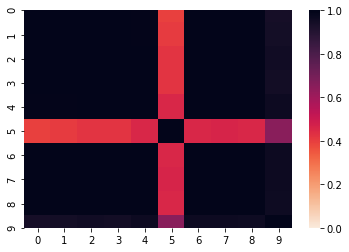

In [126]:

# bfdp_difference.append('%.3f' %    (bf_ts.cal_diff_two_bf   (csbfdp_set1,csbfdp_set2)  )  )

print (cor.shape)

import seaborn as sns
corr = cor

# print(np.sort(corr.flatten())[:1])
# print(np.sort(corr.flatten())[99:100])

# print (np.sort(corr.flatten())[:1]+np.sort(corr.flatten())[99:100])/2

sns_plot=sns.heatmap(corr,
            xticklabels=range(10),
            yticklabels=range(10),
            cmap=sns.cm.rocket_r,
            # cmap="YlGnBu_r"
            vmin=0,
            vmax=1
            )
# plt.title('False Positive = %s , P-value= %s' % (np.around(  false_positive, decimals=2  ),p))
plt.show()

59


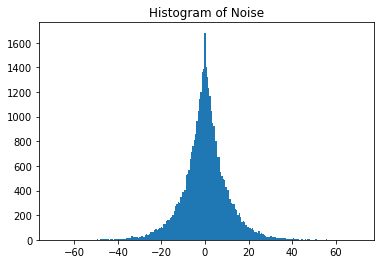

In [127]:
# lets adding some noise 

length= 38462 #the length of dataset



sensitivity = len(data.AGE.unique()) # uniqe_length of the data field e.g., gender is 2
print(sensitivity)
epsilon = 8
scale = sensitivity/epsilon

t_noise = np.random.laplace(0, scale, length)

plt.hist(t_noise, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Noise")
plt.show()

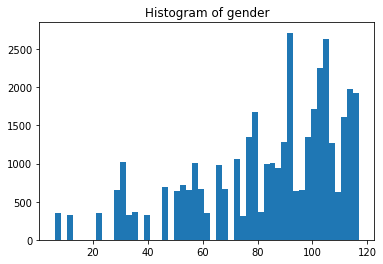

In [128]:
import matplotlib.pyplot as plt

tmp_age =data.AGE.values 

# print(tmp_gen.shape)

plt.hist(tmp_age, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of gender")
plt.show()

In [129]:
len(data)

38462

In [130]:
tmp_age = data.AGE.values
print(tmp_age.shape)


(38462,)


[ 99.74325787 101.31358008  62.08724413 107.47361573  48.10943001
   0.87087987  77.22519648  75.22992384 113.5897134   24.28735502
  10.43501285  78.99506928  64.80161243  79.09941759  74.0145901
  54.79912546  74.1735798  106.39424652 101.82524623 107.57268809]


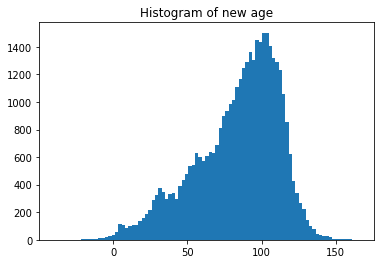

In [131]:
new_age = np.add(tmp_age,t_noise)
print(new_age[:20])
plt.hist(new_age, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of new age")
plt.show()

In [135]:
data.AGE= new_age

In [136]:
data[:20]

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,2,99.743258,1,1,1,1
1,1,101.313580,2,2,2,2
2,1,62.087244,3,3,2,3
3,1,107.473616,4,3,3,4
4,1,48.109430,5,4,1,5
5,1,0.870880,6,2,4,6
6,2,77.225196,7,3,1,7
7,1,75.229924,8,4,4,6
8,2,113.589713,9,2,5,8
9,1,24.287355,10,5,4,9


In [137]:
dataset = list(zip(*(data[fn].tolist() for fn in features)))
original_risks = klcalculator.find_risks_for_records(dataset)
klcalculator.display_risks(features, original_risks)

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,0.950303,15.2311,8.7882,3.00353,2.33085,9.73929
1,1.05147,15.2311,14.2311,2.99185,2.31117,9.83883
2,1.05147,15.2311,8.83883,2.97789,2.31117,9.70758
3,1.05147,15.2311,8.72335,2.97789,2.32444,9.77171
4,1.05147,15.2311,11.3243,3.01561,2.33085,9.3485
5,1.05147,15.2311,12.0612,2.99185,2.33236,2.60658
6,0.950303,15.2311,11.2311,2.97789,2.33085,10.0612
7,1.05147,15.2311,8.85611,3.01561,2.33236,2.60658
8,0.950303,15.2311,12.4238,2.99185,2.31098,9.77171
9,1.05147,15.2311,8.72335,2.97996,2.33236,9.32426


In [ ]:
# lets adding some noise 

length= 38462 #the length of dataset

sensitivity = 2 # uniqe_length of the data field e.g., gender is 2
epsilon = 4
scale = sensitivity/epsilon

t_noise = np.random.laplace(0, scale, length)

